# Asemic writing with DrawBot

Translated from 'Asemic writing with Flat' by [Allison Parrish](https://www.decontextualize.com/)


This is a tutorial on how to use drawBot, the random functions from [Numpy](http://www.numpy.org/) and [bezmerizing](https://github.com/aparrish/bezmerizing/) (a small library that Allison Parrish made, with simple functions for working with Bézier curves) to make various kinds of asemic writing.

In [ ]:
#uncomment and install if you don't have drawBot
#!pip install git+https://github.com/typemytype/drawbot

In [3]:
import drawBot as draw
import os

Unlike Allison's original notebook using Flat, drawBot needs to save locally before it can display the image. We save the image to a temporary image called 'drawBotImage.png', and then display the drawing.

In [4]:
from IPython.display import Image, display
                
def show(png):
    drawing = Image(filename = "drawBotImage.png")
    display(drawing)

From Allison: "[Bezmerizing](https://github.com/aparrish/bezmerizing/) is a small library I made with a handful of useful functions for working with Bézier curves, including a function for making smooth curved paths based on a list of points, and a function that can style such paths by adjusting their thickness along the path. Install it directly from GitHub like so:"

In [5]:
##uncomment if you don't have this installed
#!pip3 install https://github.com/aparrish/bezmerizing/archive/master.zip

In [6]:
from bezmerizing import Polyline

From Allison: "Assuming you're running this notebook with Anaconda, you probably already have Numpy installed. [Numpy](http://www.numpy.org/) is a widely-used Python library for math and statistics. I'm going to show you how to use a handful of functions from Numpy for generating random numbers. Use the cells below to import them into your notebook:"

In [7]:
import numpy as np

In [8]:
from numpy.random import uniform, normal, choice

## Making shapes with drawBot

Drawing with drawBot consists of a few steps:

1. Create a newDrawing within Drawbot
2. Add a new page to the document
3. Draw things
4. Save the image(s)
5. Display the page (or the document).

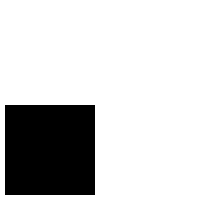

In [9]:
draw.newDrawing()
draw.newPage(200, 200)
draw.rect(5,5,90,90)
draw.saveImage("drawBotImage.png")
draw.endDrawing()

show(Image)

This creates a rectangle at position (5, 5) on the page with a width of 90 and a height of 90. ([See the documentation here for more primitives that you can make.](https://www.draw.com/content/shapes.html))

To add a fill or stroke effect to a shape, you can specify the properties before you draw them. You can typically set the color with a red, green, blue and alpha value. They take values that are between 0 and 1, so you might have to do a bit of conversion in your head if you are used to using values of 0 through 255.

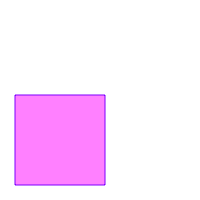

In [10]:
draw.newDrawing()
draw.newPage(200, 200)
draw.fill(1, 0.5, 1, 1)
draw.stroke(0.5, 0, 1, 1)
draw.rect(15,15,90,90)
draw.saveImage("drawBotImage.png")
draw.endDrawing()
show(Image)

Note about the coordinate system: Drawbot is set up such that the *lower-left corner* of the page is (0, 0). The X-axis increases as you move to the right of the page, while the Y-axes increases as you move *upwards*.

Let's make a function to be more efficient in defining our shapes!

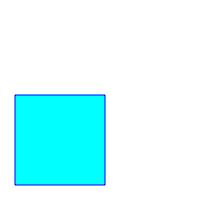

In [11]:
def shape_properties(fill_color,stroke_color):
    draw.fill(*fill_color)
    draw.stroke(*stroke_color)
    
draw.newDrawing()
draw.newPage(200, 200)
shape_properties((0, 1, 1, 1),(0, 0, 1, 1))
draw.rect(15,15,90,90)
draw.saveImage("drawBotImage.png")
draw.endDrawing()

show(Image)

To add another shape to the drawing, add a .oval to the page (x, y, diameter 1, diameter 2)

If you want the circle to be a different color (or have a different stroke color or stroke width) from the rectangle, you can reuse the shape_properties fuction:

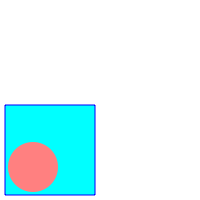

In [12]:
draw.newDrawing()
draw.newPage(200, 200)
shape_properties((0, 1, 1, 1),(0, 0, 1, 1))
draw.rect(5,5,90,90)
shape_properties((1, 0.5, 0.5, 1),(0, 0, 0, 0))
draw.oval(8,8,50,50)
draw.saveImage("drawBotImage.png")
draw.endDrawing()

show(Image)


In addtion, you can note that `draw.fill(None)` will cause the shape to not have a fill, and `strokeWidth()` will allow you to define stroke widths.

## Randomness with numpy

From Allison: "For the purposes of this tutorial, let's think about asemic writing as a kind of random process. Our method of generating asemic writing with a computer will be to simulate the random movement of a hand holding a pen. The movement of the pen is constrained in certain ways—i.e., at any point in the process, some pen movements are more likely to happen than other pen movements. To model this process, we need a way to generate random numbers.

Fortunately, the Numpy library has a wide variety of random number generators with different useful properties. Let's talk about a few of them.

### Uniform distribution

The `uniform()` function returns a number between 0 and 1, drawn from a "uniform distribution." The word "uniform" here means that every value in the domain has *the same chance of being generated*—no number or range of numbers is more likely than any other. Run the cell below multiple times to see what happens."

In [13]:
uniform()

0.6695604020418934

Using a `for` loop, you can generate a series of numbers to see what the distribution looks like. (You can change the number `8` to something larger to generate more numbers and better understand the distribution.)

In [14]:
for i in range(8):
    print(uniform())

0.3858085480022395
0.6734297037962707
0.5470553092026841
0.5623240892572767
0.6296043541161297
0.9359064679359742
0.033357087112991235
0.8953590709521819


If you give two parameters to `uniform()`, the function will evaluate to a number chosen from that range (with the first parameter being the low end of the range, and the second parameter being the high end.)

In [15]:
for i in range(8):
    print(uniform(-5, 5))

3.750923310856109
0.7338883786342665
1.2767384999628408
-1.0050860268197779
-2.0473939778700467
0.5702374515380839
-4.1516810404817495
2.145740667926031


If you need an integer instead of a floating-point number (i.e., a number with a decimal point), you can wrap the call to `uniform()` in a call to `int()`. The cell below simulates rolling a [twenty-sided die](https://en.wikipedia.org/wiki/Dice#Standard_variations):

In [16]:
for i in range(8):
    print(int(uniform(20)+1))

7
5
20
7
17
3
14
19


### Normal distribution

A random number generator with a normal distribution (also called the Gaussian distribution or the "bell curve") produces values mostly clustered around a particular number. When generating a random number with a normal distribution, you specify the "center" of the distribution (i.e., the number that the values will cluster around) and the value for the standard deviation of the distribution, which controls the "spread" of numbers returned, above and below the center. (~70% of numbers will be within this range; ~95% will be within double the range.) Generate a random number with a normal distribution using the `normal()` function:

In [17]:
normal(0, 2)

1.7339618725366241

The first parameter is the center, and the second is the standard deviation. (These are often called *mu* and *sigma*, respectively.) Run it a number of times and you should see that the numbers generated mostly cluster around the center:

In [18]:
for i in range(8):
    print(normal(0, 2))

1.7681839524443332
2.9881810442310295
0.8818628891735856
2.6377179353963496
-1.2351099167966675
1.955579890864693
-0.23191100865146763
-1.842516642688051


Normal distributions are very useful in computer-generated art because they allow us to introduce and control variation, keeping values mostly in the same range.

### Truncated normal distribution

You may have noticed that sometimes the random number generator for the normal distribution produces values well outside the standard deviation. That's not a bug—it's just how normal distributions work. (In any data set, there are sometimes extreme outliers.)

Nevertheless, in computer-generated art there's often a need to generate random numbers from a normal distribution that are *constrainted* to a particular range. (For example, you might want to generate a random color with a normal distribution, but never want your color values to fall outside of the range 0–255.) For this, you can use a *truncated normal distribution*. The following cell defines a function `t_normal()` to produce such values.

In [19]:
from scipy.stats import truncnorm
def t_normal(a, b, mu, sigma):
    tn = truncnorm((a-mu)/sigma, (b-mu)/sigma, loc=mu, scale=sigma)
    return tn.rvs(1)[0]

The first parameter is the low end of the range, the second parameter is the high end, the third parameter is the center and the fourth parameter is the standard deviation.

In [20]:
t_normal(0, 255, 10, 10)

4.627574501289877

### Choosing from a list with probabilities

The `choice()` function implements a kind of *weighted* random choice, where you can set the weights randomly. The code in the cell below picks one of `50`, `100` or `150` (the values between the first set of brackets). It will pick these with 15% probability, 80% probability, and 5% probability respectively (as specified by the values between the second set of brackets).

In [21]:
choice([50, 100, 150], p=[0.15, 0.8, 0.05])

100

Calling this function multiple times should result in the specified distribution:

In [22]:
for i in range(8):
    print(choice([50, 100, 150], p=[0.15, 0.8, 0.05]))

50
100
50
100
100
100
100
50


Without the `p` parameter, the `choice()` function defaults to a uniform distribution (i.e., no result is more likely than any other):

In [23]:
for i in range(8):
    print(choice([50, 100, 150]))

50
50
50
100
50
150
150
100


The `sample()` function (from Python's standard `random` module) takes a list of values and returns the specified number of values, randomly selected (using a uniform distribution) from the list.

In [24]:
from random import sample

In [25]:
sample([5, 10, 15, 20], 2)

[20, 15]

## Visualizing distributions 

The code in the cell below places circles on a page with the (x, y) coordinates of their centers determined by different random distributions. The small red circles are uniformly distributed; the medium-sized green circles are normally distributed and the large blue circles are in a truncated normal distribution (centered on the center of the page, with the same spread.)

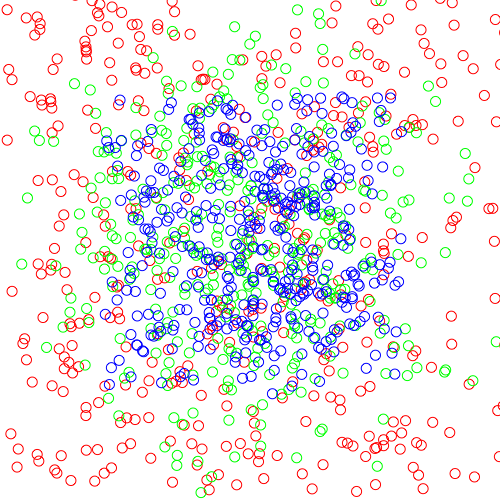

In [26]:
def shape_properties(fill_color,stroke_color):
    return lambda: (
        drawBot.fill(*fill_color),
        drawBot.stroke(*stroke_color))
    
uniform_dstb = shape_properties((1, 0, 0, 0),(1, 0, 0, 1)) #red
normal_dstb = shape_properties((0, 1, 0, 0),(0, 1, 0, 1)) #green
t_normal_dstb = shape_properties((0, 0, 1, 0),(0, 0, 1, 1))#blue

mu = 250 #center of normal distributions
sigma = 100 #standard deviation of normal disributions
sample_n = 400 #number of "samples" 

## Drawbot starts here ##

drawBot.newDrawing()
drawBot.newPage(500, 500)

for i in range(sample_n):
    uniform_dstb()
    drawBot.oval(uniform(500),uniform(500),10,10)
    
for i in range(sample_n):
    normal_dstb()
    drawBot.oval(normal(mu, sigma),normal(mu, sigma),10,10)
    
for i in range(sample_n):
    t_normal_dstb()
    drawBot.oval(t_normal(100,400, mu, sigma),t_normal(100, 400,mu, sigma),10,10)
    
drawBot.saveImage("drawBotImage.png")
drawBot.endDrawing()

show(Image)

> Exercise: Copy the visualization above, but rewrite it to visualize three normal distributions with different standard deviations.

## Assiging Color Functions

Let's expand our 'Shape Properties' to include stroke width! Also, I'm assigning functions to have red, green, blue, and black colors so we don't have to write them in the future.

In [348]:
def shape_properties(fill_color, stroke_color,stroke_width):
    return lambda: (
        draw.fill(*fill_color),
        draw.stroke(*stroke_color),
        draw.strokeWidth(stroke_width))

red = (1,0,0,1)
green = (0,1,0,1)
blue = (0,0,1,1)
black = (0,0,0,1)
transparent_black = (0,0,0,0.1)
no_color = (0,0,0,0)
stroke_width = 1

set_red = shape_properties(no_color,red,stroke_width)
set_green = shape_properties(no_color,green,stroke_width)
set_blue = shape_properties(no_color,blue,stroke_width)
set_black = shape_properties(no_color,black,stroke_width)
set_trsblk = shape_properties(no_color,transparent_black,stroke_width)


## Random compositions

The following code uses random numbers to set the stroke color, fill color, and position of a rectangle on the page. (Run it multiple times to see the results.)

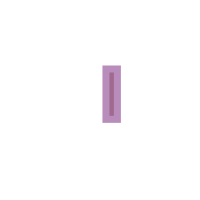

In [306]:
stroke_color = (t_normal(0, 1, 0.5, 0.2),
                t_normal(0, 1, 0.5, 0.2),
                uniform(0,1),
                uniform(0,1))

stroke_width = int(uniform(30))
fill_color = (uniform(0,1),
                uniform(0,1),
                uniform(0,1),
                choice([0.4,1], p =[0.9,0.1]))

shape_details = shape_properties(fill_color,stroke_color,stroke_width)

## Drawbot Starts Here ##
draw.newDrawing()
draw.newPage(200, 200)
shape_details()
draw.rect(normal(100, 30), normal(100, 30),normal(50, 30), normal(20, 30))

draw.saveImage("drawBotImage.png")
draw.endDrawing()

show(Image)

From Allison:  "Play around with the parameters a bit until you understand how it works. Anywhere you see a call to `uniform()`, `normal()`, `t_normal()` or `choice()`, you can replace it with a call to another one of those same functions. (Note that colors values *always* have to be integers and always need to be between 0–255.)"

The cell below uses a `for` loop to draw multiple rectangles:

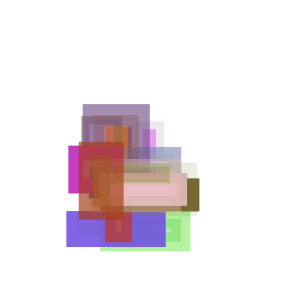

In [307]:
draw.newDrawing()
draw.newPage(300, 300)

for i in range(int(uniform (8, 24))):
    stroke_color = (t_normal(0, 1, 0.5, 0.2),t_normal(0, 1, 0.5, 0.2),uniform(0,1),uniform(0,1))

    stroke_width = int(uniform(30))
    fill_color = (uniform(0,1),uniform(0,1),uniform(0,1),choice([0.4,1], p =[0.9,0.1]))
    
    shape_details = shape_properties(fill_color,stroke_color,stroke_width)
    shape_details()
    draw.rect(normal(100, 30), normal(100, 30),normal(50, 30), normal(20, 30))

draw.saveImage("drawBotImage.png")
draw.endDrawing()

show(Image)

Here's another example that uses circles instead of rectangles:

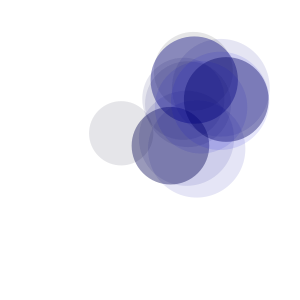

In [308]:
draw.newDrawing()
draw.newPage(300, 300)

for i in range(12):
    stroke_color = (0,0,0,0)
    stroke_width = 0
    fill_color = (0,0,uniform(0,1),choice([0.1,0.4], p =[0.5,0.5]))
    
    shape_details = shape_properties(fill_color,stroke_color,stroke_width)
    shape_details()
    diameter = t_normal(0,100,150,30)
    draw.oval(normal(150, 30), normal(150, 30),diameter, diameter)

draw.saveImage("drawBotImage.png")
draw.endDrawing()

show(Image)

## Saving to disk

If you make something with DrawBot that you really like, you can save it to disk for later use. 

`All supported file extensions: pdf, png, jpg, jpeg, tif, tiff, svg, gif, bmp, mp4, mov, icns, *. (* will print out all actions.)`

In [309]:
#This will save where your notebook file is!

#save as SVG!
draw.saveImage("saveImage.svg")

# For raster options, you can also specify resultion. Default is 72.

#Save it as PNG!
draw.saveImage("saveImage.png", imageResolution = 300)

## Polylines

Okay, so, random numbers are good! But how does this help us model pen strokes? Good question. We're getting there! The next step in our asemic journey is to create a *series of lines* linking a given list of points (specified as (x, y) coordinates). The name for this shape—a series of connected lines—is a *polyline*.

The first step in making a polyline is to generate some points. The following cell creates a Python list with randomly-generated points:

In [310]:
pts = []
for i in range(10):
    pts.append([uniform(300), uniform(300)])

Here's what the points look like. This is a data structure called a *list of lists* (i.e., a list that has other lists as its elements), which for various reasons is a convenient way to store polylines and polygons.

In [311]:
pts

[[28.51023709523389, 176.1444628958842],
 [98.00086237563278, 208.6121485508314],
 [198.22718909887806, 33.87677815017696],
 [279.24063044007295, 144.30234261339064],
 [6.4466575807311415, 257.62797202739847],
 [71.71310952535094, 251.75255235974348],
 [72.48248426892278, 184.6902110101895],
 [16.752625080189546, 88.37737277349049],
 [117.36749569263719, 286.29881474321115],
 [257.6420263476445, 153.2108529148612]]

And here's some code to draw the points on a page, using a circle to mark each point.

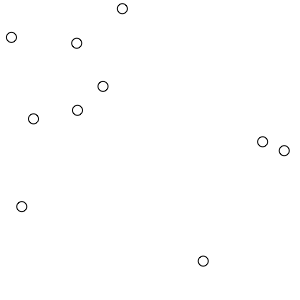

In [312]:
draw.newDrawing()
draw.newPage(300, 300)

set_black()

for item in pts: # loop through the pts list, assigning each point to variable item
    draw.oval(item[0], item[1], 10,10)
    
draw.saveImage("drawBotImage.png")
draw.endDrawing()

show(Image)

The flat library has a built-in shape type, `.polygon()`, which draws lines connecting points. But the function wants the points as a list of `x` and `y` coordinates. Note: As a default, a polygon is a closed path, but you can specify to leave it open.


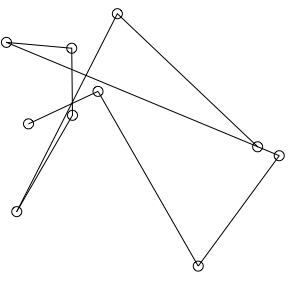

In [314]:
draw.newDrawing()
draw.newPage(300,300)

set_black()

for item in pts:
    draw.oval(item[0]-5,item[1]-5,10,10) 
    #subtracting half of circle diamater so it draws line in center

draw.polygon(*pts, close=False)

draw.saveImage("drawBotImage.png")
draw.endDrawing()
show(Image)


Combining all of this in the same cell, and getting rid of the circles on the points, gives us some code that generates designs that *almost* look like alien glyphs:

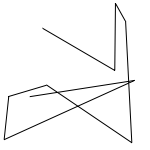

In [385]:
pts = []
for i in range(10):
    pts.append([uniform(150), uniform(150)])

draw.newDrawing()
draw.newPage(150,150)
set_black()
draw.polygon(*pts, close=False)

draw.saveImage("drawBotImage.png")
draw.endDrawing()
show(Image)


## Drawing Bezier Paths

So far, we've been using the Polygon shape to generate our drawings. Let's switch over to using the bezier paths. 

This is the simplified process:
1. create a new path via `newPath()` 
2. create a starting point via `moveTo()`
3. make a series of points  via `lineTo()`  or `curveTo`
4. (optional) close path  via `closePath()`
5. show the path via `drawPath`

Here's the same example as above, using Bezier Paths:

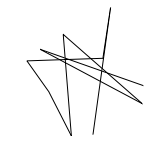

In [386]:
pts = []
for i in range(10):
    pts.append([uniform(150), uniform(150)])

draw.newDrawing()
draw.newPage(150,150)
set_black()
draw.newPath()
draw.moveTo(pts[0])

for item in pts[1:]:
    draw.lineTo(item)

draw.drawPath()

draw.saveImage("drawBotImage.png")
draw.endDrawing()
show(Image)


## Polyline objects

The `bezmerizing` library comes with a `Polyline` object that represents a polyline. It has a number of useful features that we'll get into below. To make a `Polyline` object, pass in a 2d list of points to the constructor like so:

In [383]:
pts = [[20, 20], [40, 40], [10, 30], [50, 85], [85, 25]]
pline = Polyline(pts)

To draw a `Polyline` object, pass it to DrawBot's path functions. Since DrawBot's paths accepts Numpy arrays, use the `.vertices` attribute.

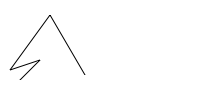

In [389]:
draw.newDrawing()
draw.newPage(200,100)
set_black()

draw.newPath()
draw.moveTo(pline.vertices[0])

for item in pline.vertices[1:]:
    draw.lineTo(item)

draw.drawPath()


draw.saveImage("drawBotImage.png")
draw.endDrawing()
show(Image)

A `Polyline` object has `.translate()`, `.rotate()` and `.scale()` methods that operate similar to their equivalents in Processing. These methods apply the transformation to the vertices of the `Polyline` and return a new `Polyline` with the transformed vertices. For example:

In [390]:
pline.scale(2) # returns a new Polyline twice as big

Polyline([[40.0000, 40.0000], [80.0000, 80.0000], [20.0000, 60.0000], [100.0000, 170.0000], [170.0000, 50.0000]])

In [391]:
pline.translate(10, -5) # returns a new Polyline translated up and to the left

Polyline([[30.0000, 15.0000], [50.0000, 35.0000], [20.0000, 25.0000], [60.0000, 80.0000], [95.0000, 20.0000]])

In [392]:
pline.rotate(np.pi*0.25) # rotates the polyline pi/4 radians

Polyline([[28.2843, 0.0000], [56.5685, 0.0000], [28.2843, 14.1421], [95.4594, 24.7487], [77.7817, -42.4264]])

This makes it possible to write a bit of code that produces polylines like so:

In [394]:
pts = []
for i in range(12):
    pts.append([normal(), normal()])
pline = Polyline(pts)

And then draw the same polyline in multiple ways and in multiple places.

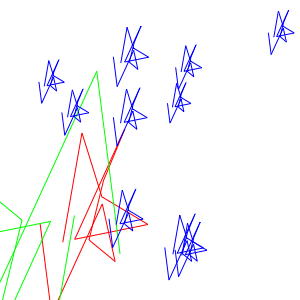

In [412]:
draw.newDrawing()
draw.newPage(300,300)


# 50 times bigger, at 100,100
scaled_pline = pline.scale(50).translate(100,100)

set_red()
draw.newPath()
draw.moveTo(scaled_pline.vertices[0])
for item in scaled_pline.vertices[1:]:
    draw.lineTo(item)
draw.drawPath()

# rotated
rotated_pline = pline.scale(100).rotate(np.pi)
set_green()
draw.newPath()
draw.moveTo(rotated_pline.vertices[0])
for item in rotated_pline.vertices[1:]:
    draw.lineTo(item)
draw.drawPath()

#many small copies

set_blue()
for i in range(10):
    small_pline= pline.scale(uniform(10,20)).translate(uniform(50,300),uniform(50,300))
    draw.newPath()
    draw.moveTo(small_pline.vertices[0])
    for item in small_pline.vertices[1:]:
        draw.lineTo(item)
    draw.drawPath()
    
    
draw.saveImage("drawBotImage.png")
draw.endDrawing()
show(Image)

If you have other transformations in mind, you can always manipulate a Polyline's `.vertices` array directly:

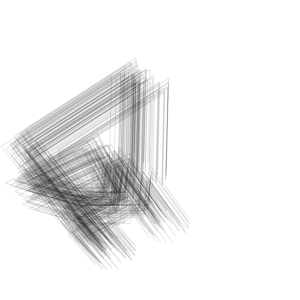

In [432]:
# generate polyline
pts = []
for i in range(12):
    pts.append([normal(), normal()])
pline = Polyline(pts)

# draw polyline many times on top of itself

draw.newDrawing()
draw.newPage(300,300)
set_trsblk()

for i in range(100):
    # add a bit of noise to the coordinates on each loop
    pline.vertices += np.random.randn(2) * 0.1
    changed_pline = pline.scale(50).translate(100,100)
    draw.newPath()
    draw.moveTo(changed_pline.vertices[0])
    for item in changed_pline.vertices[1:]:
        draw.lineTo(item)
    draw.drawPath()
    

draw.saveImage("drawBotImage.png")
draw.endDrawing()
show(Image)

## Path Properties

Let's take a quick detour into setting [Path Properties](https://www.drawbot.com/content/shapes/pathProperties.html). There's many things we can apply beyond `strokeWidth` and color. There is `miterLimit` that you can use on corner points. Then you can use `lineJoin` to assign a value of miter, round, or bevel. You can also set a `lineCap`, to assign values of butt, square, and round. We'll use this below.

## Polylines on a grid

Let's pursue this aesthetic a little bit further. Introducing further constraints to the randomness will result in designs that give the impression of conforming to an underlying system (and, let's hypothesize, thereby give an impression of being more like "writing"). The code below also uses random polylines, but constrains the polylines to begin and end on certain points in the grid.

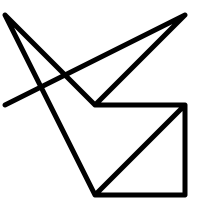

In [469]:
pts = []
for i in range(12):
    x = choice([0, 0.5, 1])
    y = choice([0, 0.5, 1])
    pts.append([x, y])
pline = Polyline(pts)
lines = pline.scale(180).translate(5, 5)

set_stroke = shape_properties(no_color,black,5)

draw.newDrawing()
draw.newPage(200,200)
draw.lineCap("round")
draw.miterLimit(5)
draw.lineJoin("round")
set_stroke()
draw.newPath()
draw.moveTo(lines.vertices[0])

for item in lines.vertices[1:]:
    draw.lineTo(item)

draw.drawPath()

draw.saveImage("drawBotImage.png")
draw.endDrawing()
show(Image)


The key bit of code here is:

In [470]:
choice([0, 0.5, 1])

0.5

... which is a Python expression that returns one of `0`, `0.5`, and `1` (at random). Using this expression for both the `x` and `y` coordinate of each point on the polyline leads to a result wherein each polyline randomly connects one of nine points on a grid. The `.scale()` and `.translate()` methods scale this polyline up and move it to the appropriate place on the screen (i.e., scaled up to 90 units, moved 5 units from the side just to give it a little border).

The cell below defines a function, `make_char()`, that generates a series of points using a more general version of this expression. It adds four to twelve segments to the polyline (randomly determined).

In [485]:
def make_char():
    pts = []
    for i in range(int(t_normal(4, 12, 8, 2))):
        x = (choice([0, 0.5, 1]))
        y = (choice([0, 0.5, 1]))
        pts.append([x, y])
    return Polyline(pts)

The results of the `make_char()` function:

In [532]:
make_char()

Polyline([[0.5000, 0.5000], [0.0000, 1.0000], [0.5000, 0.0000], [0.5000, 0.5000], [0.0000, 1.0000], [0.0000, 0.0000], [0.0000, 0.5000], [0.5000, 0.5000], [0.5000, 1.0000]])

The following cell draws these "characters" on a grid, so we can see many variations at once:

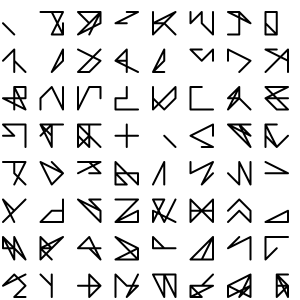

In [536]:
set_stroke = shape_properties(no_color,black,2)
canvas = 300
draw.newDrawing()
draw.newPage(canvas,canvas)
draw.lineCap("round")
draw.miterLimit(5)
draw.lineJoin("round")
set_stroke()

grid_n = 8 # change the number of elements in the grid on one side
grid_size = canvas / grid_n
for i in range(grid_n):
    for j in range(grid_n):
        char_pline = make_char()
        scaled_pline = char_pline.scale(grid_size * 0.6).translate(3+i*grid_size, 3+j*grid_size)
        draw.newPath()
        draw.moveTo(scaled_pline.vertices[0])
        for item in scaled_pline.vertices[1:]:
            draw.lineTo(item)
        draw.drawPath()
                
draw.saveImage("drawBotImage.png")
draw.endDrawing()
show(Image)

Now we're getting somewhere. When your sci-fi author friend texts you and says "Hey, I need something that looks like a writing system for space aliens for the cover of my next book," you've got something all ready to go.

> Exercise: Can you make these polylines fall on a 4x4 grid instead of a 3x3 grid? Or a 5x5 grid?

> Exercise: Add some randomness to each point's placement, so not all points fall directly on the grid.

> Exercise: Change the aspect ratio of the "characters"—make them wider than they are tall, or taller than they are wide.